In [19]:
using Luxor
using PythonCall
using Colors
using Plots
using PlotlyJS
using IterTools
using DataFrames
using OpenStreetMapX
include("prepare_data.jl")
include("analyse.jl")
include("plots.jl")

plot_attractiveness_of_sectors_prcnt (generic function with 1 method)

In [20]:
points,attr,bounds = calculate_attractiveness_for_city_points(
                                                        "Gdańsk",
                                                        "8",
                                                        1000,
                                                        100,
                                                        :education,
                                                        500)

┌ Info: Read map data from cache Gdańsk.osm.cache
└ @ OpenStreetMapX /home/adamkas/.julia/packages/OpenStreetMapX/gCd33/src/parseMap.jl:97


(ENU[ENU(199.76855895544253, 12.56837241442278, 0.0) ENU(198.58518670359112, 25.08714320486901, 0.0) … ENU(199.76855895544253, -12.56837241442276, 0.0) ENU(200.1635359706701, 1.287550063335195e-13, 0.0); ENU(399.53711791088506, 25.13674482884556, 0.0) ENU(397.17037340718224, 50.17428640973802, 0.0) … ENU(399.53711791088506, -25.13674482884552, 0.0) ENU(400.3270719413402, 2.57510012667039e-13, 0.0); … ; ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf); ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf)], [2.4488608830659007 2.4305353335553628 … 2.4861188900313587 2.4674065190460936; 2.3192480638351074 2.289722196024818 … 2.3802725304403833 2.3494416413040238; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], 2099×5 DataFrame
  Row │ adminname  wayid      nodes       x         y       
      │ String     Int64      Int64       Float64   Float64 
──────┼─────────────────────────────────────────────────────
    1 │ Gdańsk     109612202   595

In [47]:
function to_zero(elem)
    if elem == Inf || elem < 0 
        return 0
    end
    return elem
end
vls = to_zero.(log.(attr))


100×100 Matrix{Real}:
 0.895623  0.888112  0.880655  0.873272  …  0.918264  0.910723  0.903168
 0.841243  0.82843   0.81576   0.803253     0.880336  0.867215  0.854178
 1.7973    0.727524  0.711402  0.695358     1.8551    1.83727   1.81799
 1.81321   0.595722  0.576394  0.556985     1.88956   1.86612   1.84063
 1.81272   0.432833  0.409613  0.386093     2.25311   1.88065   1.84786
 0         0         0         0         …  2.42166   2.09177   1.59951
 0         0         0         0            2.49949   2.1333    1.61849
 0         0         0         0            2.53973   2.1515    1.61066
 0         0         0         0            2.54148   2.14623   1.57642
 0         0         0         0            2.51804   2.11835   1.51706
 ⋮                                       ⋱                      
 0         0         0         0            0         0         0
 0         0         0         0            0         0         0
 0         0         0         0            0         0    

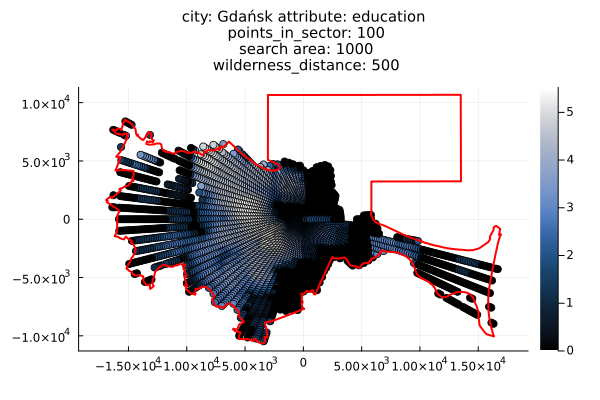

In [48]:
plot_heatmap(points,vls,bounds,:education,"Gdańsk",100,1000,500)

In [45]:
points_sec,attr_sec,bounds_sec = calculate_attractiveness_for_city_sectors(
                                                        "Gdańsk",
                                                        "8",
                                                        1000,
                                                        100,
                                                        :education,
                                                        500)

┌ Info: Read map data from cache Gdańsk.osm.cache
└ @ OpenStreetMapX /home/adamkas/.julia/packages/OpenStreetMapX/gCd33/src/parseMap.jl:97


(ENU[ENU(199.76855895544253, 12.56837241442278, 0.0) ENU(198.58518670359112, 25.08714320486901, 0.0) … ENU(199.76855895544253, -12.56837241442276, 0.0) ENU(200.1635359706701, 1.287550063335195e-13, 0.0); ENU(399.53711791088506, 25.13674482884556, 0.0) ENU(397.17037340718224, 50.17428640973802, 0.0) … ENU(399.53711791088506, -25.13674482884552, 0.0) ENU(400.3270719413402, 2.57510012667039e-13, 0.0); … ; ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf); ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf)], [0.04683742122158847, 0.027052302257431795, 0.023869505692707897, 0.017658834549846205, 0.014642807158278386, 0.01440058341002107, 0.0160851497111235, 0.022258795646511627, 0.028770024956239506, 0.035206626537364775  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 2099×5 DataFrame
  Row │ adminname  wayid      nodes       x         y       
      │ String     Int64      Int64       Float64   Float64 
──────┼──────────────────

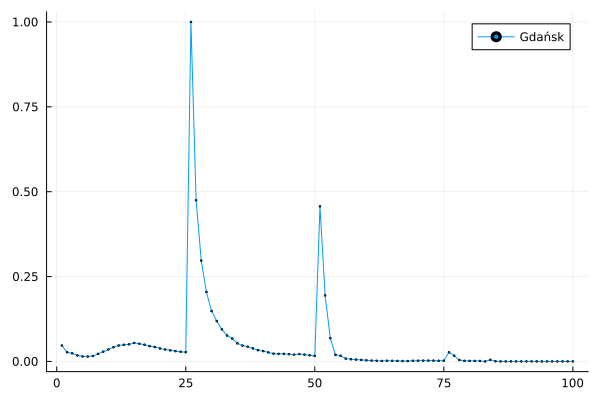

In [26]:
plotconfig = (marker=:circle, markersize=1)
plot_attractiveness_of_sectors_prcnt(attr_sec,"Gdańsk",plotconfig)